In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
tennis_major_tournament_match_statistics = fetch_ucirepo(id=300)

# data (as pandas dataframes)
X = tennis_major_tournament_match_statistics.data.features
y = tennis_major_tournament_match_statistics.data.targets

# metadata
print(tennis_major_tournament_match_statistics.metadata)

# variable information
print(tennis_major_tournament_match_statistics.variables)


{'uci_id': 300, 'name': 'Tennis Major Tournament Match Statistics', 'repository_url': 'https://archive.ics.uci.edu/dataset/300/tennis+major+tournament+match+statistics', 'data_url': 'https://archive.ics.uci.edu/static/public/300/data.csv', 'abstract': 'This is a collection of 8 files containing the match statistics for both women and men at the four major tennis tournaments of the year 2013. Each file has 42 columns and a minimum of 76 rows.', 'area': 'Other', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 127, 'num_features': 42, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Result'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C54C7K', 'creators': ['Shruti Jauhari', 'Aniket Morankar', 'Ernest Fokoue'], 'intro_paper': None, 'additional_info': {'summary': 'N/A', 'purp

In [3]:
import pandas as pd

# Get the correct data URL from the metadata of the fetched dataset
data_url = tennis_major_tournament_match_statistics.metadata['data_url']

# Read the CSV data from the correct URL
data = pd.read_csv(data_url)

# Display the first few rows of the dataframe to verify
display(data.head())

,Tournament,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,AusOpen-men,Lukas Lacko,Novak Djokovic,1,0,0.0,3.0,61,35,39,...,4.0,8.0,8.0,9.0,101.0,6.0,7.0,6.0,NaN,NaN
1,AusOpen-men,Leonardo Mayer,Albert Montanes,1,1,3.0,0.0,61,31,39,...,0.0,0.0,NaN,NaN,42.0,1.0,3.0,1.0,NaN,NaN
2,AusOpen-men,Marcos Baghdatis,Denis Istomin,1,0,0.0,3.0,52,53,48,...,4.0,13.0,12.0,16.0,126.0,6.0,7.0,6.0,NaN,NaN
3,AusOpen-men,Dmitry Tursunov,Michael Russell,1,1,3.0,0.0,53,39,47,...,1.0,7.0,NaN,NaN,79.0,2.0,2.0,3.0,NaN,NaN
4,AusOpen-men,Juan Monaco,Ernests Gulbis,1,0,1.0,3.0,76,63,24,...,3.0,5.0,16.0,28.0,127.0,1.0,6.0,7.0,6.0,NaN


In [4]:
data.shape[0]

943

In [5]:
data.columns

Index(['Tournament', 'Player1', 'Player2', 'Round', 'Result', 'FNL1', 'FNL2',
       'FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1',
       'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'TPW.1', 'ST1.1', 'ST2.1', 'ST3.1',
       'ST4.1', 'ST5.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2', 'DBF.2',
       'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2', 'TPW.2', 'ST1.2',
       'ST2.2', 'ST3.2', 'ST4.2', 'ST5.2'],
      dtype='object')

In [6]:
data.shape[1]

43

# 5.1 Data Cleaning

In [7]:
import pandas as pd
import numpy as np

features_to_keep = [
    'Result',  # Target (0 atau 1)
    # Statistik Player 1
    'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'TPW.1',
    # Statistik Player 2
    'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2', 'TPW.2'
]

data_cleaned = data[features_to_keep].copy()

display(data_cleaned.head())

,Result,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2
0,0,5.0,1.0,17.0,29.0,1.0,3.0,8.0,11.0,70.0,10.0,0.0,40.0,30.0,4.0,8.0,8.0,9.0,101.0
1,1,13.0,1.0,13.0,1.0,7.0,14.0,NaN,NaN,80.0,1.0,4.0,1.0,4.0,0.0,0.0,NaN,NaN,42.0
2,0,8.0,4.0,37.0,50.0,1.0,9.0,16.0,23.0,106.0,9.0,1.0,41.0,41.0,4.0,13.0,12.0,16.0,126.0
3,1,8.0,6.0,8.0,6.0,6.0,9.0,NaN,NaN,104.0,1.0,8.0,1.0,8.0,1.0,7.0,NaN,NaN,79.0
4,0,0.0,4.0,16.0,35.0,3.0,12.0,9.0,13.0,128.0,17.0,11.0,59.0,79.0,3.0,5.0,16.0,28.0,127.0


In [8]:
print(data_cleaned.isnull().sum())

Result      0
ACE.1      22
DBF.1       8
WNR.1     126
UFE.1     126
BPC.1       1
BPW.1       1
NPA.1      84
NPW.1      83
TPW.1     312
ACE.2      22
DBF.2       8
WNR.2     126
UFE.2     126
BPC.2       1
BPW.2       1
NPA.2      84
NPW.2      83
TPW.2     312
dtype: int64


In [9]:
data_cleaned.columns

Index(['Result', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPC.1', 'BPW.1', 'NPA.1',
       'NPW.1', 'TPW.1', 'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2',
       'NPA.2', 'NPW.2', 'TPW.2'],
      dtype='object')

In [10]:
data_cleaned = data_cleaned.fillna(0)

data_cleaned = data_cleaned.astype(int)

print(data_cleaned.isnull().sum())

Result    0
ACE.1     0
DBF.1     0
WNR.1     0
UFE.1     0
BPC.1     0
BPW.1     0
NPA.1     0
NPW.1     0
TPW.1     0
ACE.2     0
DBF.2     0
WNR.2     0
UFE.2     0
BPC.2     0
BPW.2     0
NPA.2     0
NPW.2     0
TPW.2     0
dtype: int64


In [11]:
display(data_cleaned.head())

,Result,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2
0,0,5,1,17,29,1,3,8,11,70,10,0,40,30,4,8,8,9,101
1,1,13,1,13,1,7,14,0,0,80,1,4,1,4,0,0,0,0,42
2,0,8,4,37,50,1,9,16,23,106,9,1,41,41,4,13,12,16,126
3,1,8,6,8,6,6,9,0,0,104,1,8,1,8,1,7,0,0,79
4,0,0,4,16,35,3,12,9,13,128,17,11,59,79,3,5,16,28,127


# 4.4	Exploratory Data Analysis (EDA)

/tmp/ipython-input-4187714021.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=data_cleaned, palette='viridis')


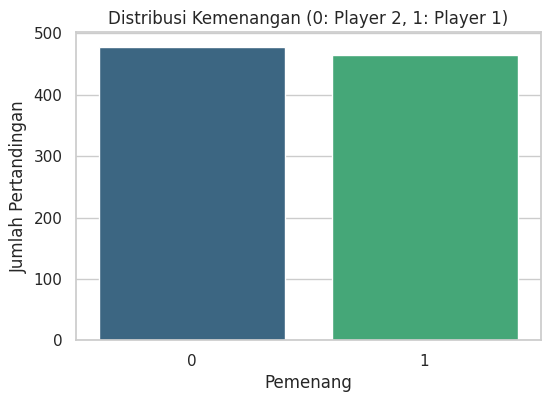

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='Result', data=data_cleaned, palette='viridis')
plt.title('Distribusi Kemenangan (0: Player 2, 1: Player 1)')
plt.xlabel('Pemenang')
plt.ylabel('Jumlah Pertandingan')
plt.show()

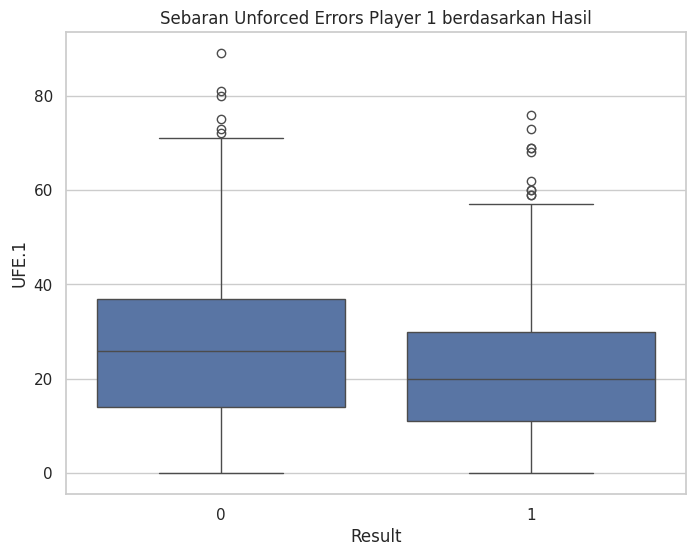

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Result', y='UFE.1', data=data_cleaned)
plt.title('Sebaran Unforced Errors Player 1 berdasarkan Hasil')
plt.show()

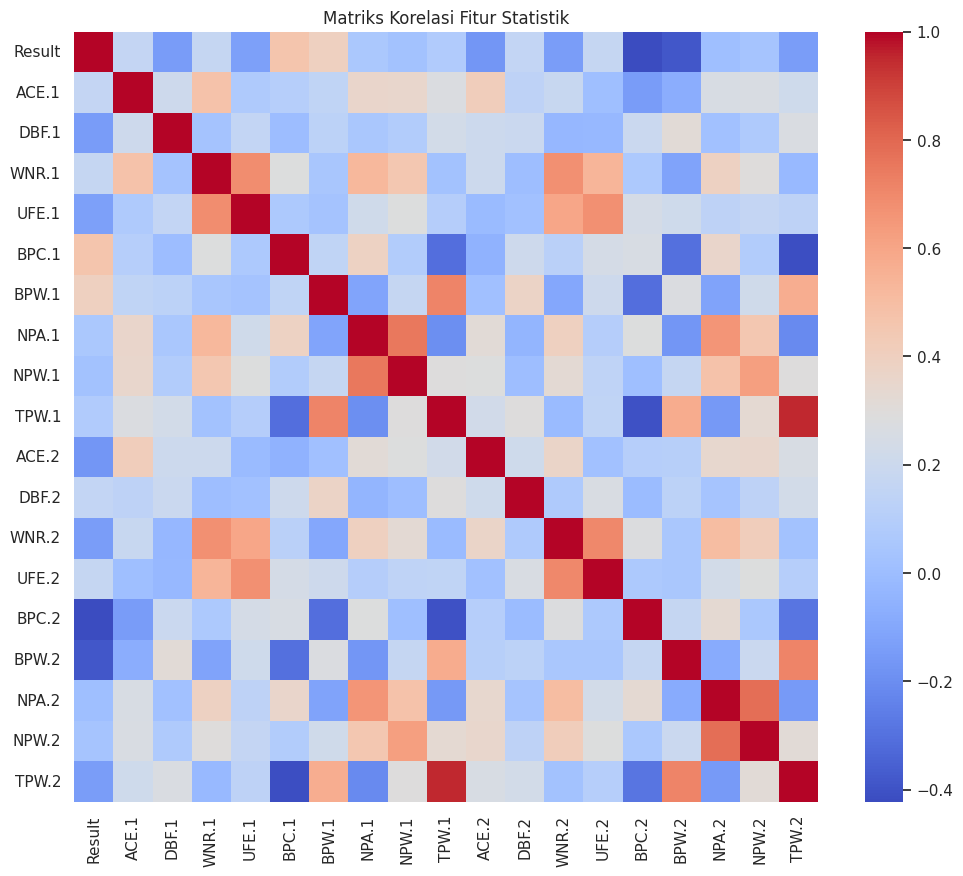

In [14]:
plt.figure(figsize=(12, 10))
corr = data_cleaned.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Matriks Korelasi Fitur Statistik')
plt.show()

# 5.2 Feature Engineering

In [15]:
data_cleaned['Efficiency_P1'] = data_cleaned['WNR.1'] / (data_cleaned['UFE.1'] + 1)
data_cleaned['Efficiency_P2'] = data_cleaned['WNR.2'] / (data_cleaned['UFE.2'] + 1)

data_cleaned['Net_Success_P1'] = data_cleaned['NPW.1'] / (data_cleaned['NPA.1'] + 1)
data_cleaned['Net_Success_P2'] = data_cleaned['NPW.2'] / (data_cleaned['NPA.2'] + 1)

print("Data setelah Feature Engineering:")
display(data_cleaned[['Result', 'Efficiency_P1', 'Net_Success_P1']].head())

Data setelah Feature Engineering:


,Result,Efficiency_P1,Net_Success_P1
0,0,0.566667,1.222222
1,1,6.500000,0.000000
2,0,0.725490,1.352941
3,1,1.142857,0.000000
4,0,0.444444,1.300000


# 5.3 Data Transformation

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5.4	Data Splitting

In [17]:
X = data_cleaned.drop('Result', axis=1)
y = data_cleaned['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah Data Training:", X_train.shape[0])
print("Jumlah Data Testing:", X_test.shape[0])

Jumlah Data Training: 754
Jumlah Data Testing: 189


# 6.1	Model 1 – Baseline Model

Akurasi Baseline (Logistic Regression): 0.8942

Classification Report Baseline:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        96
           1       0.88      0.91      0.89        93

    accuracy                           0.89       189
   macro avg       0.89      0.89      0.89       189
weighted avg       0.89      0.89      0.89       189



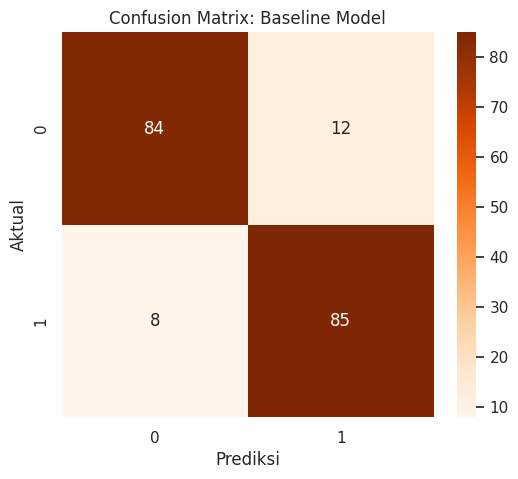

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from google.colab import files
import os

model_baseline = LogisticRegression(random_state=42, max_iter=1000)

model_baseline.fit(X_train_scaled, y_train)

y_pred_base = model_baseline.predict(X_test_scaled)
acc_base = accuracy_score(y_test, y_pred_base)


print(f"Akurasi Baseline (Logistic Regression): {acc_base:.4f}")

print("\nClassification Report Baseline:")
print(classification_report(y_test, y_pred_base))

plt.figure(figsize=(6, 5))
cm_base = confusion_matrix(y_test, y_pred_base)
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix: Baseline Model')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [22]:
filename_model1 = 'logistic_regression_model.joblib'
joblib.dump(model_baseline, filename_model1)

print(f"Model 1 berhasil disimpan sebagai {filename_model1}")
files.download(filename_model1)

Model 1 berhasil disimpan sebagai logistic_regression_model.joblib


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 6.2	Model 2 – ML/Advanced Model

Akurasi Advanced (Random Forest): 0.9365

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        96
           1       0.93      0.95      0.94        93

    accuracy                           0.94       189
   macro avg       0.94      0.94      0.94       189
weighted avg       0.94      0.94      0.94       189



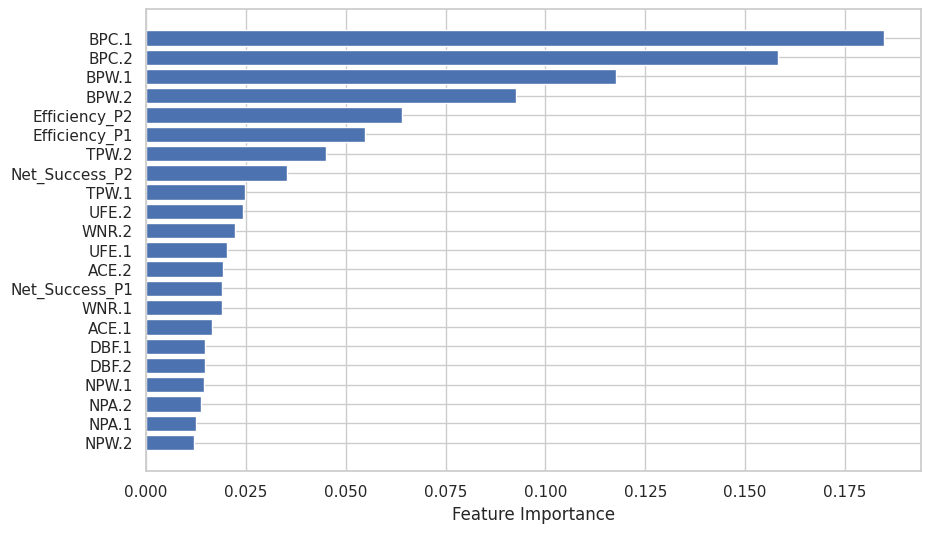

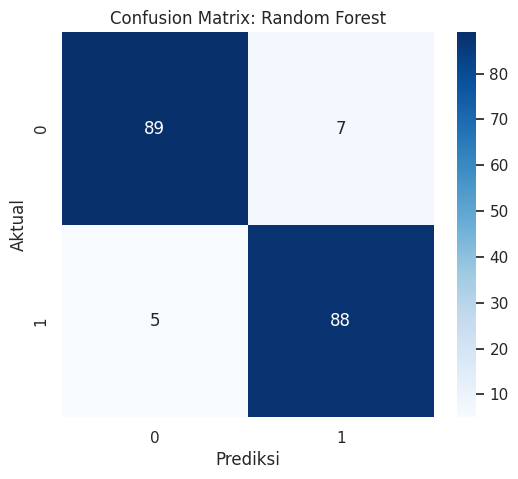

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Akurasi Advanced (Random Forest): {acc_rf:.4f}")

print("\nClassification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))

#visualisasi Feature Importance biru miring
feature_importances = model_rf.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')


plt.figure(figsize=(6, 5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [24]:
filename_model2 = 'random_forest_model.joblib'
joblib.dump(model_rf, filename_model2)

print(f"Model 2 berhasil disimpan sebagai {filename_model2}")
files.download(filename_model2)

Model 2 berhasil disimpan sebagai random_forest_model.joblib


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model 3 — Deep Learning Model (WAJIB)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5761 - loss: 0.7134 - val_accuracy: 0.8146 - val_loss: 0.5823
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6958 - loss: 0.5918 - val_accuracy: 0.8675 - val_loss: 0.4652
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7893 - loss: 0.5107 - val_accuracy: 0.8874 - val_loss: 0.3791
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8051 - loss: 0.4559 - val_accuracy: 0.8940 - val_loss: 0.3181
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8571 - loss: 0.3662 - val_accuracy: 0.9205 - val_loss: 0.2734
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8472 - loss: 0.3684 - val_accuracy: 0.9139 - val_loss: 0.2428
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8561 - loss: 0.3541 - val_accuracy: 0.9205 - val_loss: 0.2218
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8822 - loss: 0.3038 - val_accuracy: 0.9272 - v

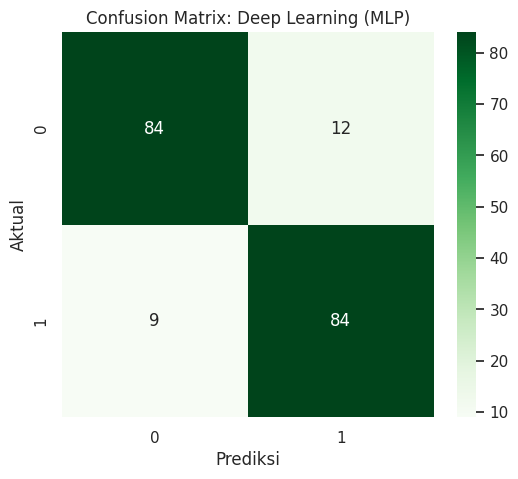

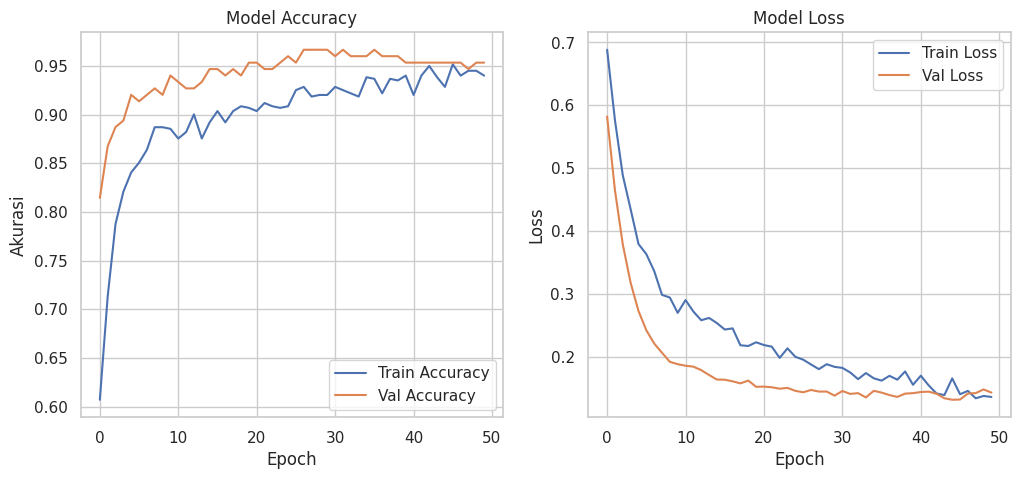

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_dl.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

y_pred_dl_prob = model_dl.predict(X_test_scaled)
y_pred_dl = (y_pred_dl_prob > 0.5).astype(int).flatten()

acc_dl = accuracy_score(y_test, y_pred_dl)

print(f"Akurasi Deep Learning (MLP): {acc_dl:.4f}")

#klasifikasi report
print("\nClassification Report Deep Learning:")
print(classification_report(y_test, y_pred_dl))

#confusion matrix
plt.figure(figsize=(6, 5))
cm_dl = confusion_matrix(y_test, y_pred_dl)
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: Deep Learning (MLP)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [27]:
filename_model3 = 'mlp_model.h5'
model_dl.save(filename_model3)

print(f"Model 3 berhasil disimpan sebagai {filename_model3}")
files.download(filename_model3)

Model 3 berhasil disimpan sebagai mlp_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. Definisi Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(19,)), # Sesuaikan input_shape dengan jumlah fitur (19)
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# 2. Compile Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3. Tampilkan Summary (INI KODE YANG ANDA CARI)
print("=== Model Summary ===")
model.summary()

=== Model Summary ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

=== HASIL AKHIR ===
                      Model   Akurasi
0   Baseline (Logistic Reg)  0.894180
1  Advanced (Random Forest)  0.936508
2       Deep Learning (MLP)  0.888889


/tmp/ipython-input-1242695933.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Akurasi', data=comparison_df, palette='magma')


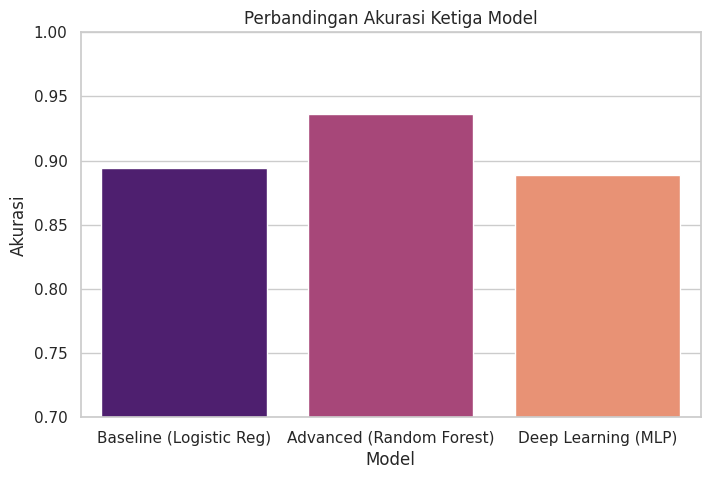

In [29]:
# Prediksi Deep Learning (Outputnya probabilitas 0.0 - 1.0)
# Kita bulatkan: > 0.5 jadi 1 (Menang), <= 0.5 jadi 0 (Kalah)
y_pred_dl_prob = model_dl.predict(X_test_scaled)
y_pred_dl = (y_pred_dl_prob > 0.5).astype(int).flatten()

acc_dl = accuracy_score(y_test, y_pred_dl)

# Buat DataFrame Perbandingan
comparison_df = pd.DataFrame({
    'Model': ['Baseline (Logistic Reg)', 'Advanced (Random Forest)', 'Deep Learning (MLP)'],
    'Akurasi': [acc_base, acc_rf, acc_dl]
})

print("\n=== HASIL AKHIR ===")
print(comparison_df)

# Visualisasi Perbandingan
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Akurasi', data=comparison_df, palette='magma')
plt.ylim(0.7, 1.0) # Set batas bawah biar bedanya kelihatan
plt.title('Perbandingan Akurasi Ketiga Model')
plt.show()